In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [7]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
total = pd.concat([train, test], axis = 0)
total

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1327,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,79000
361,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
362,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
363,1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000


## 分離目標

In [18]:
# 將目標分析欄位取出來
targetlabel = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
target = total.loc[:, targetlabel]
target

,LotFrontage,GarageYrBlt,MasVnrArea
0,60.0,2005.0,0.0
1,68.0,2007.0,0.0
2,34.0,2006.0,108.0
3,60.0,1925.0,0.0
4,94.0,1976.0,0.0
...,...,...,...
360,70.0,NaN,0.0
361,NaN,2002.0,0.0
362,49.0,2005.0,0.0
363,59.0,2005.0,182.0


## 以平均值及中位數來填補缺失值

In [24]:
# 平均值
target_mean = pd.DataFrame()
for i in targetlabel : 
    mean =  target[i].mean()
    target_mean[i]= target[i].fillna(mean)

target_mean

,LotFrontage,GarageYrBlt,MasVnrArea
0,60.000000,2005.000000,0.0
1,68.000000,2007.000000,0.0
2,34.000000,2006.000000,108.0
3,60.000000,1925.000000,0.0
4,94.000000,1976.000000,0.0
...,...,...,...
360,70.000000,1978.506164,0.0
361,70.049958,2002.000000,0.0
362,49.000000,2005.000000,0.0
363,59.000000,2005.000000,182.0


In [25]:
# 中位數
target_median = pd.DataFrame()
for i in targetlabel : 
    mean =  target[i].median()
    target_median[i]= target[i].fillna(mean)

target_median

,LotFrontage,GarageYrBlt,MasVnrArea
0,60.0,2005.0,0.0
1,68.0,2007.0,0.0
2,34.0,2006.0,108.0
3,60.0,1925.0,0.0
4,94.0,1976.0,0.0
...,...,...,...
360,70.0,1980.0,0.0
361,69.0,2002.0,0.0
362,49.0,2005.0,0.0
363,59.0,2005.0,182.0


## 繪圖

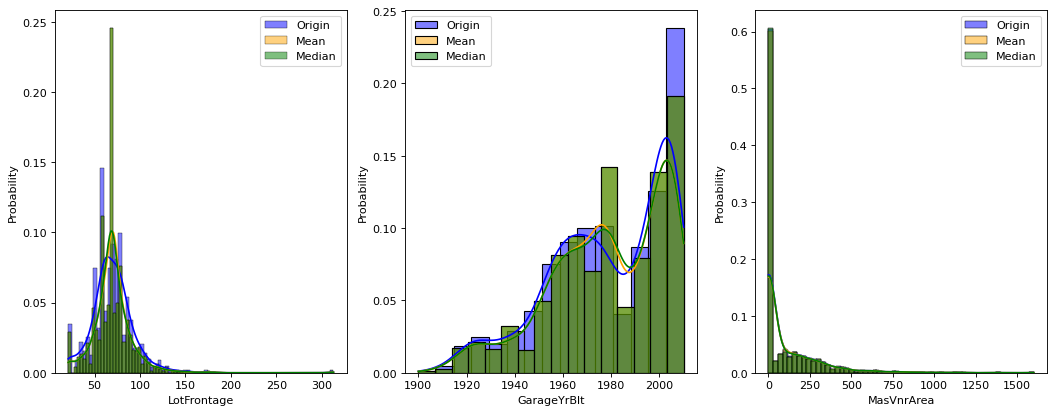

In [80]:
# 分析缺失值，練習繪製直方圖及機率圖 
targetlabel = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
colors = ['blue', 'orange', 'green']
names = ['Origin', 'Mean', 'Median']

plt.figure(figsize = (16,6), dpi = 80)
for d in range(len(targetlabel)):
    plt.subplot(1, 3, d+1)
    dataset = [target[targetlabel[d]], target_mean[targetlabel[d]], target_median[targetlabel[d]]]
    for i in range(3) :
        sns.histplot(dataset[i], kde = True, stat = 'probability', element = 'bars', label = names[i], color = colors[i])
    plt.legend()

plt.show()

## 分析標準差

In [133]:
""" Your code hear: """
targetlabel = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for d in range(len(targetlabel)) :
    print(targetlabel[d])
    dataset = [target[targetlabel[d]], target_mean[targetlabel[d]], target_median[targetlabel[d]]]
    for i in range(3):
        std = dataset[i].std()
        if i == 0:
            print(f'Origin:{std}')
        elif i == 1:
            print(f'mean:{std}')
        else :
            print(f'median:{std}')
    print()

LotFrontage
Origin:24.284751774483208
mean:22.024022688706957
median:22.027677088952416

GarageYrBlt
Origin:24.689724768590242
mean:23.994583259057606
median:23.997021528934233

MasVnrArea
Origin:181.0662065872166
mean:180.56911242597204
median:180.7313733581237



## 透過分析標準差可以得到什麼結果？

In [ ]:
LotFrontage 有較多的缺失值(約缺失 17% 的資料)，故透過平均值及中位數填補具有較高的破壞性(標準差改變較多)

In [121]:
std11 = target['LotFrontage'].std()
std12 = target_mean['LotFrontage'].std()
std13 = target_median['LotFrontage'].std()
print(f'origin:{std11}')
print(f'mean:{std12}')
print(f'median:{std13}')
print()
std21 = target['GarageYrBlt'].std()
std22 = target_mean['GarageYrBlt'].std()
std23 = target_median['GarageYrBlt'].std()
print(f'origin:{std21}')
print(f'mean:{std22}')
print(f'median:{std23}')
print()
std31 = target['MasVnrArea'].std()
std32 = target_mean['MasVnrArea'].std()
std33 = target_median['MasVnrArea'].std()
print(f'origin:{std31}')
print(f'mean:{std32}')
print(f'median:{std33}')
print()

origin:24.284751774483208
mean:22.024022688706957
median:22.027677088952416

origin:24.689724768590242
mean:23.994583259057606
median:23.997021528934233

origin:181.0662065872166
mean:180.56911242597204
median:180.7313733581237



In [131]:
targetlabel = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for d in range(3):
    std1= target[targetlabel[d]].std()
    std2= target_mean[targetlabel[d]].std()
    std3= target_median[targetlabel[d]].std()
    print(std1,std2,std3)

24.284751774483208 22.024022688706957 22.027677088952416
24.689724768590242 23.994583259057606 23.997021528934233
181.0662065872166 180.56911242597204 180.7313733581237


In [137]:
for d in range(3) : 
    data = [target[targetlabel[d]], target_mean[targetlabel[d]], target_median[targetlabel[d]]]
    for i in range(3):
        std = data[i].std()
        print(std)

24.284751774483208
22.024022688706957
22.027677088952416
24.689724768590242
23.994583259057606
23.997021528934233
181.0662065872166
180.56911242597204
180.7313733581237


In [ ]:
targetlabel = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
L 

# 將目標分析欄位取出來
Lotfrontage = [total.LotFrontage]
GarageYrBlt = [total.GarageYrBlt]
MasVnrArea = [total.MasVnrArea]

# filled with mean
Lotfrontage.append(Lotfrontage[0].fillna(Lotfrontage[0].mean()))
GarageYrBlt.append(GarageYrBlt[0].fillna(GarageYrBlt[0].mean()))
MasVnrArea.append(MasVnrArea[0].fillna(MasVnrArea[0].mean()))

# filled with median
Lotfrontage.append(Lotfrontage[0].fillna(Lotfrontage[0].median()))
GarageYrBlt.append(GarageYrBlt[0].fillna(GarageYrBlt[0].median()))
MasVnrArea.append(MasVnrArea[0].fillna(MasVnrArea[0].median()))